## Necessary Libraries

In [6]:
#importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#importing the dataset
df = pd.read_csv("Dataset/PHFood_Brazil.csv", low_memory=False)

# show first 5 data sample
df.head()

# Shape of the dataset
df.shape

(439299, 52)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439299 entries, 0 to 439298
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     439299 non-null  int64  
 1   Year                           439299 non-null  int64  
 2   Food                           437103 non-null  object 
 3   Food (English)                 437103 non-null  object 
 4   Region                         438273 non-null  object 
 5   State                          438273 non-null  object 
 6   Harvest Area (hectares)        432688 non-null  float64
 7   Food Production (tons)         432688 non-null  float64
 8   Energy (kcal)                  432688 non-null  float64
 9   Protein (g)                    415804 non-null  float64
 10  Lipids (g)                     432688 non-null  float64
 11  Carbohydrates (g)              432688 non-null  float64
 12  Fiber (g)                     

## Missing Values

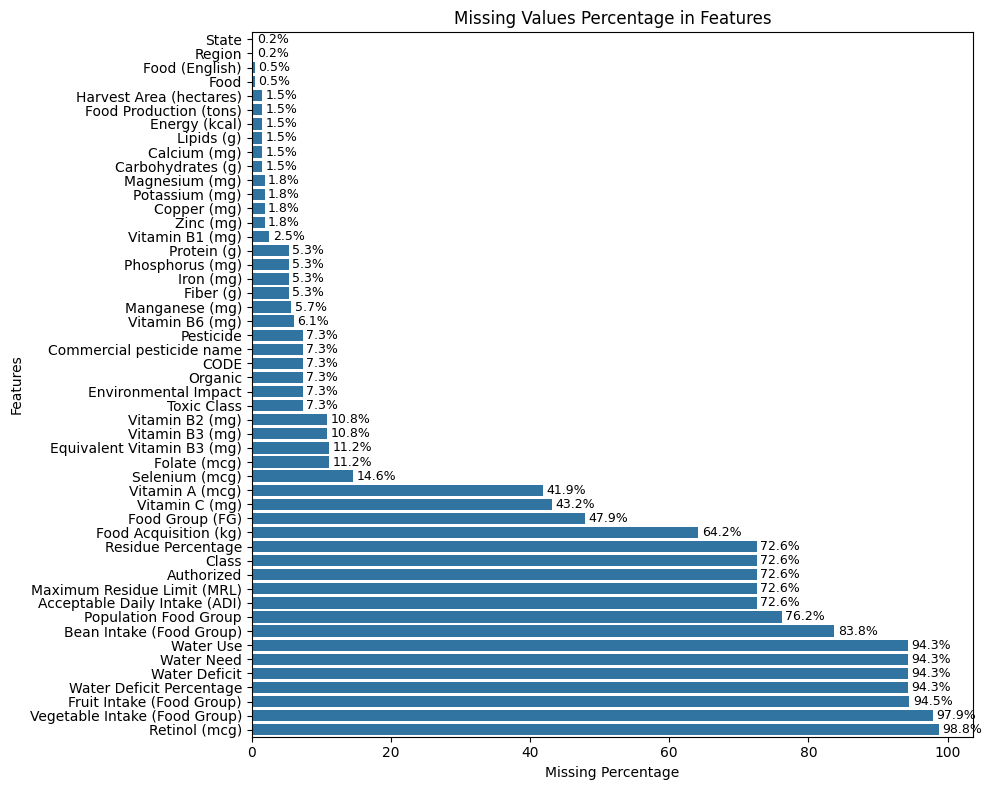

In [8]:
# Checking for missing values
missing_values = df.isnull().sum()

# Calculating the percentage of missing values
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=True)  # ascending for horizontal bars

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, orient='h')
plt.xlabel("Missing Percentage")
plt.ylabel("Features")
plt.title("Missing Values Percentage in Features")

# Annotate the bars
for i, value in enumerate(missing_percentage.values):
    plt.text(value + 0.5, i, f"{value:.1f}%", va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Histograms for Feature Distribution

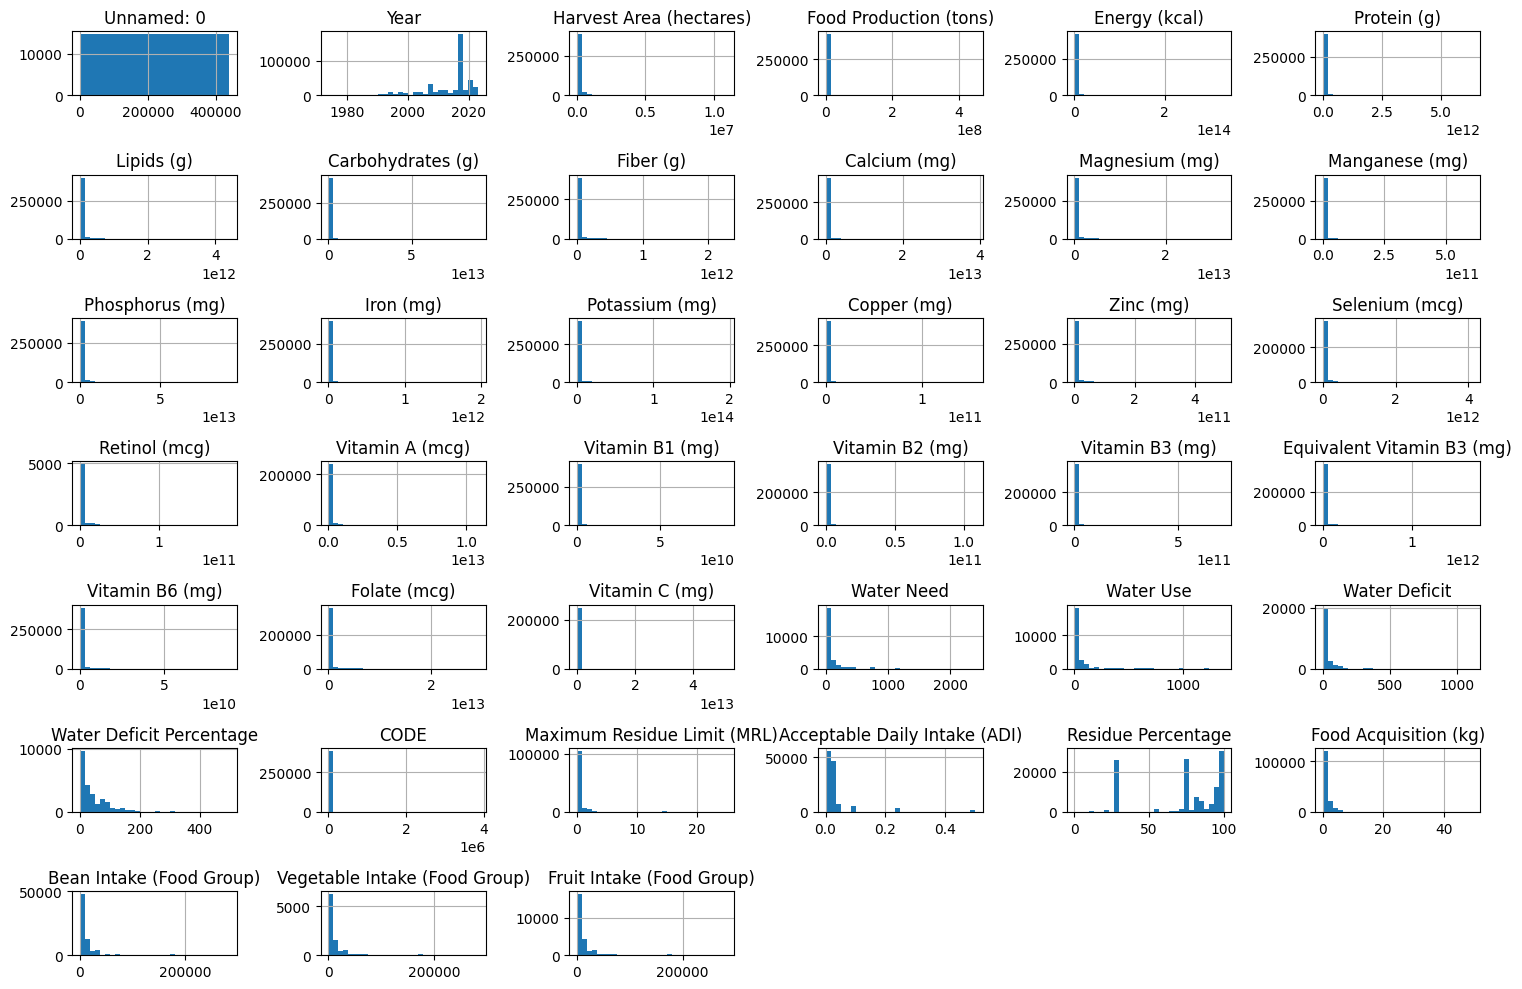

In [9]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Correlation Heatmap

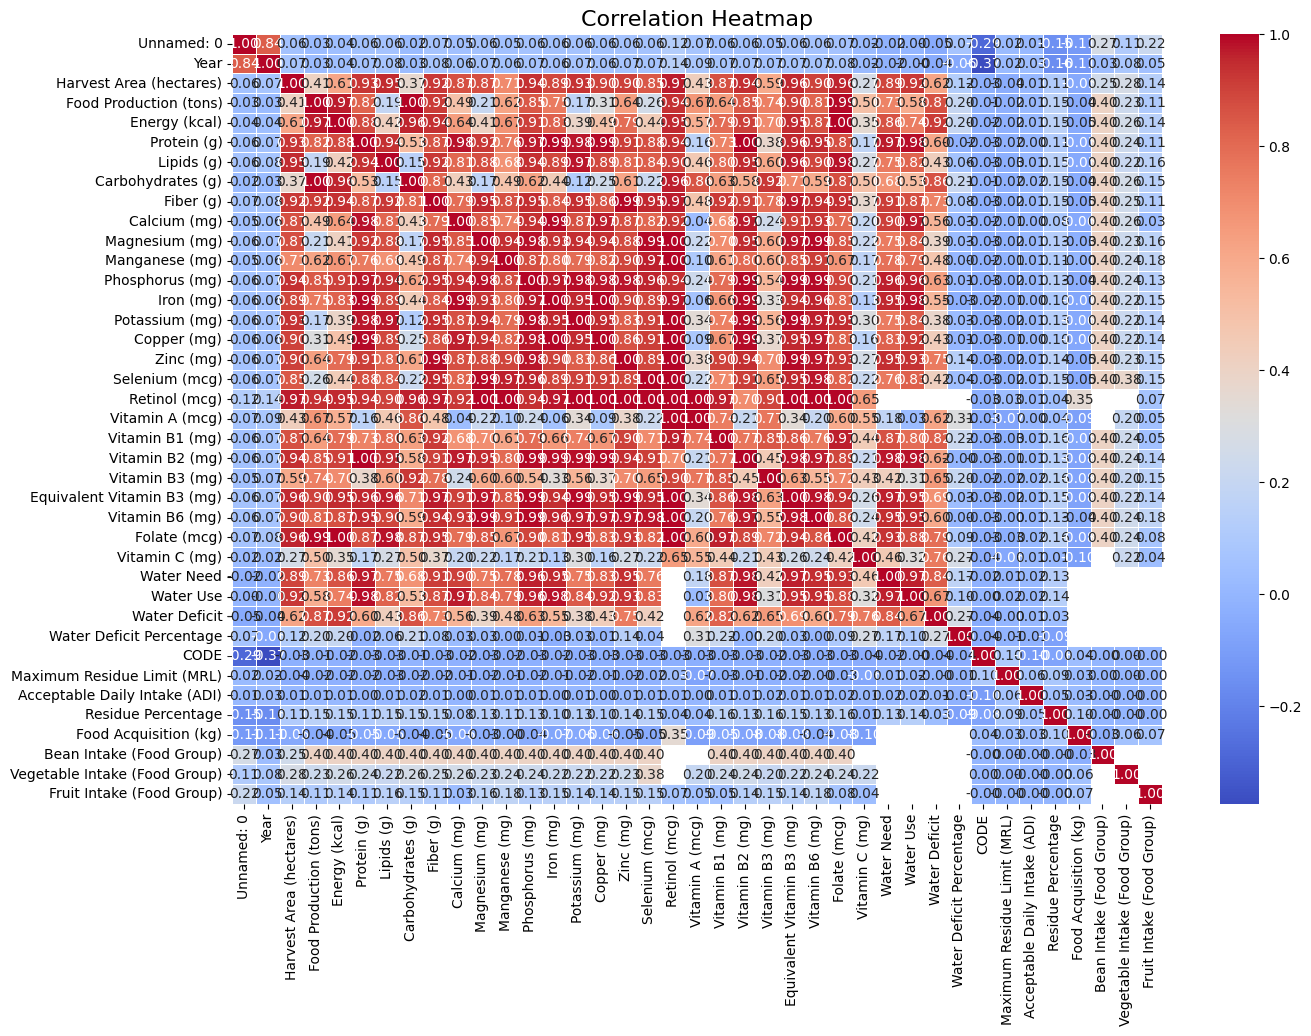

In [10]:

# Correlation heatmap for numerical features
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Boxplots

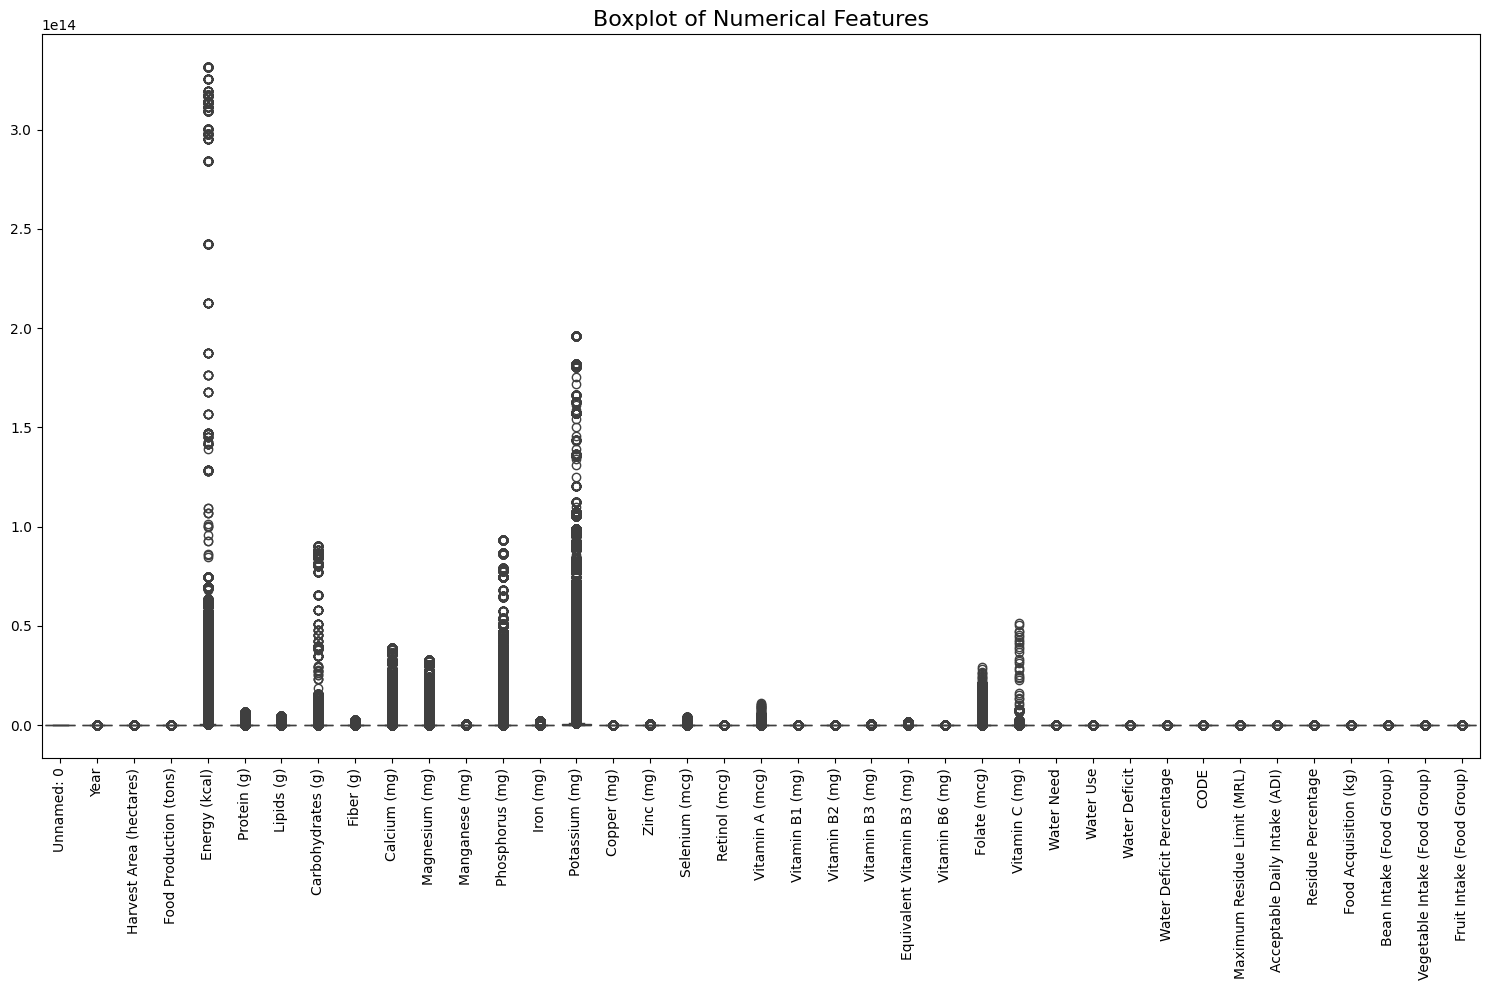

In [11]:
# Data distribution for numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Boxplot for numerical columns to check for spread and any potential outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns], orient="v")
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Target Column

In [12]:
# Creating target variable column "healthy"
df["healthy"] = df["Energy (kcal)"] < 250  # Initial rule-based labeling
df["healthy"] = df["healthy"].astype(int)

# Define a more comprehensive health score
df["health_score"] = (
    df["Protein (g)"] * 2 +            # More protein = better
    df["Fiber (g)"] * 1.5 +            # Fiber is also good
    df["Vitamin A (mcg)"] * 0.5 +
    df["Vitamin C (mg)"] * 0.5 +
    df["Iron (mg)"] * 0.5 +
    df["Calcium (mg)"] * 0.5 -
    df["Lipids (g)"] * 1 -             # Fats and carbs reduce score
    df["Carbohydrates (g)"] * 0.5
)

# Classify as healthy if above median health score
df["healthy"] = (df["health_score"] >= df["health_score"].median()).astype(int)

# Foods above the median score → healthy = 1
# Foods below the median score → healthy = 0

## Class Balance

healthy
0    321606
1    117693
Name: count, dtype: int64


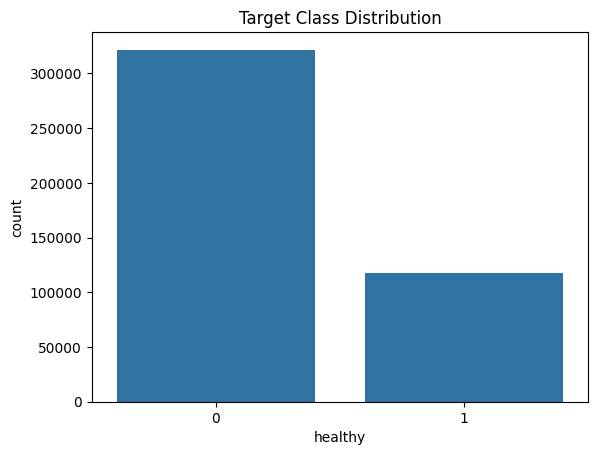

In [13]:
print(df['healthy'].value_counts())

sns.countplot(data=df, x='healthy')
plt.title('Target Class Distribution')
plt.show()
# As we see we have a slightly imbalanced dataset, we can use SMOTE to balance the dataset also class weights in models.

# Data Preprocessing

## Dropping Unnecessary Columns

In [14]:
# Dropping unnecessary columns (50% missing values)
df = df.dropna(thresh=0.5 * len(df), axis=1)

# Display all columns after dropping
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Food', 'Food (English)', 'Region', 'State',
       'Harvest Area (hectares)', 'Food Production (tons)', 'Energy (kcal)',
       'Protein (g)', 'Lipids (g)', 'Carbohydrates (g)', 'Fiber (g)',
       'Calcium (mg)', 'Magnesium (mg)', 'Manganese (mg)', 'Phosphorus (mg)',
       'Iron (mg)', 'Potassium (mg)', 'Copper (mg)', 'Zinc (mg)',
       'Selenium (mcg)', 'Vitamin A (mcg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Equivalent Vitamin B3 (mg)',
       'Vitamin B6 (mg)', 'Folate (mcg)', 'Vitamin C (mg)', 'CODE',
       'Commercial pesticide name', 'Pesticide', 'Organic', 'Toxic Class',
       'Environmental Impact', 'Food Group (FG)', 'healthy', 'health_score'],
      dtype='object')


In [45]:

# List of columns to drop
columns_to_drop = ["Unnamed: 0", "Year", "Region", "State", "Harvest Area (hectares)", "Food Production (tons)", "CODE", "Commercial pesticide name", "Pesticide","Organic", "Toxic Class","Environmental Impact", "Food","Food Group (FG)", "Food (English)"] 

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Check remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439299 entries, 0 to 439298
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Energy (kcal)               432688 non-null  float64
 1   Protein (g)                 415804 non-null  float64
 2   Lipids (g)                  432688 non-null  float64
 3   Carbohydrates (g)           432688 non-null  float64
 4   Fiber (g)                   415804 non-null  float64
 5   Calcium (mg)                432688 non-null  float64
 6   Magnesium (mg)              431178 non-null  float64
 7   Manganese (mg)              414294 non-null  float64
 8   Phosphorus (mg)             415804 non-null  float64
 9   Iron (mg)                   415804 non-null  float64
 10  Potassium (mg)              431178 non-null  float64
 11  Copper (mg)                 431178 non-null  float64
 12  Zinc (mg)                   431178 non-null  float64
 13  Selenium (mcg)

## Handling Missing Values

In [15]:

# Fill numerical columns with mean
num_cols = df.select_dtypes(include=['number']).columns
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = pd.DataFrame(num_imputer.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

# Fill categorical columns with mode — only if such columns exist
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    df[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]), columns=cat_cols, index=df.index)

## Outliers Removal

In [16]:

# Compute Q1, Q3, and IQR for numerical columns
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

# Remove outliers using IQR method
df_no_outliers_iqr = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show dataset shape changes
rows_removed = df.shape[0] - df_no_outliers_iqr.shape[0]
print(f"\nOriginal shape: {df.shape}")
print(f"Shape after removing outliers (IQR method): {df_no_outliers_iqr.shape}")
print(f"Total rows removed: {rows_removed}")


Original shape: (439299, 39)
Shape after removing outliers (IQR method): (239998, 39)
Total rows removed: 199301


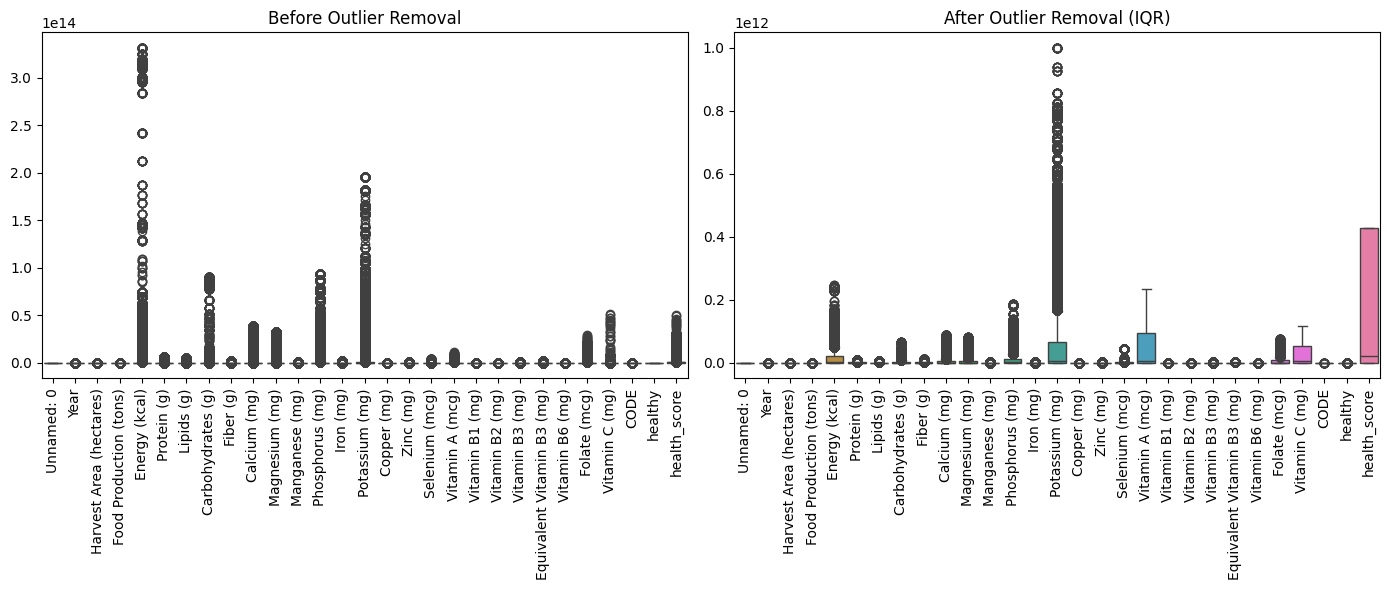

In [17]:
# Visualize the distribution of numerical features before and after outlier removal

# Select numeric columns again to avoid issues
numeric_cols = df.select_dtypes(include=['number']).columns

# Adjust figure size for better visualization
plt.figure(figsize=(14, 6))

# Before Outlier Removal
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Before Outlier Removal')

# After Outlier Removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers_iqr[numeric_cols])
plt.xticks(rotation=90)
plt.title('After Outlier Removal (IQR)')

plt.tight_layout()
plt.show()

## Spliting The Data

In [18]:
# Splitting the dataset into features and target variable (70% train, 30% test)

# X: features, y: target
X = df.drop("healthy", axis=1)
y = df["healthy"]

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
# Splitting 30% test into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming `df` is already loaded and preprocessed (after dropping unnecessary columns, filling missing values, etc.)

# Step 1: Split your data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    df.drop(columns=["health_score", "healthy"]),  # Exclude target and unnecessary columns
    df["healthy"],  # Target variable
    test_size=0.30,  # 30% goes to temp (validation + test)
    random_state=42,
    stratify=df["healthy"]  # Stratify by target variable to ensure balanced splits
)

# Step 2: Split the remaining 30% into validation and test (15% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,  # 50% of 30% → 15% each for validation and test
    random_state=42,
    stratify=y_temp  # Stratify by target variable to ensure balanced splits
)

# Step 3: Identify categorical columns (ensure we only apply encoding to categorical features)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())

# Step 4: Apply One-Hot Encoding only to categorical columns, keep sparse format
encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_cols)],
    remainder='passthrough'  # Keep other columns as is (numerical columns)
)

# Fit on the training data and transform all splits
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)  # Use the same encoder to transform validation
X_test_encoded = encoder.transform(X_test)  # Use the same encoder to transform test

print("One-Hot Encoding Applied Successfully!")

# Optionally, convert the resulting sparse matrices to DataFrame if needed (for further analysis or ML models)
# For large datasets, keep them as sparse matrices to save memory


Categorical Columns: ['Food', 'Food (English)', 'Region', 'State', 'Commercial pesticide name', 'Pesticide', 'Organic', 'Toxic Class', 'Environmental Impact', 'Food Group (FG)']
One-Hot Encoding Applied Successfully!


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Step 1: Split your data into train, validation, and test sets (similar to your previous code)
X_train, X_temp, y_train, y_temp = train_test_split(
    df.drop(columns=["health_score", "healthy"]),
    df["healthy"],
    test_size=0.30,  # 30% goes to temp (validation + test)
    random_state=42,
    stratify=df["healthy"]
)

# Step 2: Split the remaining 30% into validation and test (15% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,  # 50% of 30% → 15% each for validation and test
    random_state=42,
    stratify=y_temp
)

# Step 3: Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())

# Step 4: Create a column transformer with both one-hot encoding for categorical and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_cols),  # One-hot encoding for categorical features
        ('num', StandardScaler(with_mean=False), X_train.select_dtypes(include=['float64', 'int64']).columns)  # Standard scaling for numerical features
    ],
    remainder='passthrough'  # Keep other columns as is
)

# Step 5: Apply transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)  # Use the same transformer for validation
X_test_transformed = preprocessor.transform(X_test)  # Use the same transformer for test

# Print success message
print("✅ Feature Normalization and One-Hot Encoding Applied Successfully!")


Categorical Columns: ['Food', 'Food (English)', 'Region', 'State', 'Commercial pesticide name', 'Pesticide', 'Organic', 'Toxic Class', 'Environmental Impact', 'Food Group (FG)']
✅ Feature Normalization and One-Hot Encoding Applied Successfully!
